In [1]:
import tensorflow as tf
# from tensorflow import keras
import keras

In [3]:
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# MNIST dataset download
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Model 생성, compile
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training / Evaluation
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0425 - accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0384 - accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0379 - accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0337 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0330 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0310 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0291 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0281 - accuracy: 0.9902
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0283 - accuracy: 0.9898
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 

[0.07999414950609207, 0.9804999828338623]

In [7]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

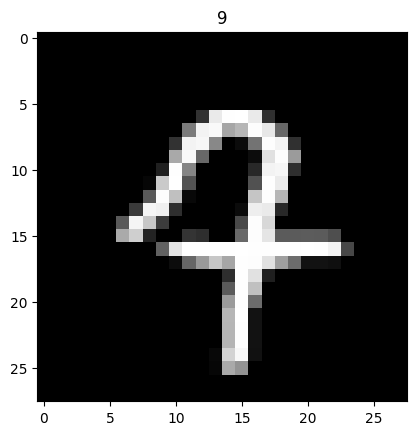

In [9]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

In [ ]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass
# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# shape을 변경하여 학습된 model에 넣고 결과 확인
image = np.reshape(image, (1, 28, 28))
print(model.predict(image))

print("Model이 예측한 값은 {} 입니다.".format(np.argmax(model.predict(image), -1)))